###***TITLE:Road Accident Analysis and Risk Identification***

**Import required libraries**

In [3]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the dataset
df = pd.read_csv("accident.csv")

print("Dataset Loaded")
print(df.head())


Dataset Loaded
  Accident_ID           State        Date      Time                Reason  \
0        1001  Andhra Pradesh  2021-05-01  15:30:00              Speeding   
1        1002       Karnataka  2021-05-02  18:45:00         Drunk Driving   
2        1003           Delhi  2021-05-03  10:15:00  Poor Road Conditions   
3        1004     Maharashtra  2021-05-04  06:00:00        Driver Fatigue   
4        1005   Uttar Pradesh  2021-05-05  21:20:00              Speeding   

   Number_of_Deaths Number_of_Injuries Road_Type Weather_Conditions  \
0                 2                  3     Rural              Sunny   
1                 1                  4     Urban              Rainy   
2                 0                  2     Urban              Foggy   
3                 3                  6     Rural              Sunny   
4                 1                  2     Rural              Sunny   

  Alcohol_Involved Driver_Fatigue Road_Conditions  Speed_Limit  
0               No            

**📊 1. Accident Causes – Pie Chart**

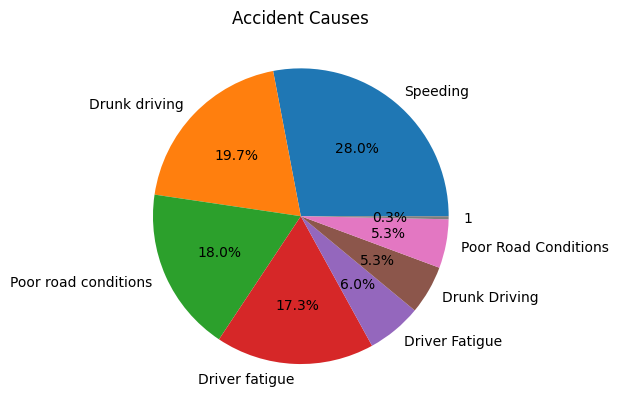

In [4]:
cause_count = df['Reason'].value_counts()

plt.pie(cause_count,
        labels=cause_count.index,
        autopct='%1.1f%%')
plt.title("Accident Causes")
plt.show()


**📊 2. Top Accident States – Bar Char**

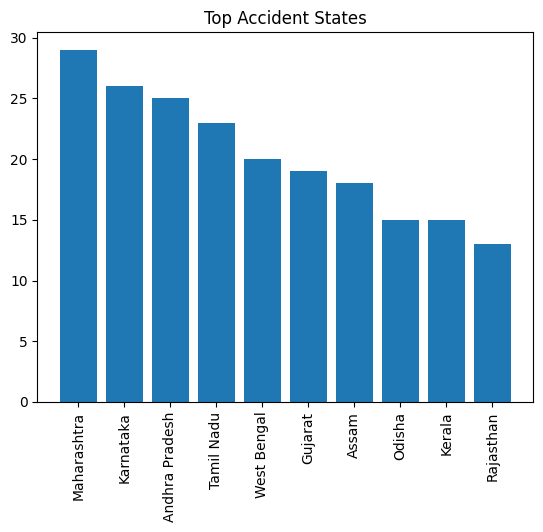

In [5]:
state_count = df['State'].value_counts().head(10)

plt.bar(state_count.index, state_count.values)
plt.xticks(rotation=90)
plt.title("Top Accident States")
plt.show()


**📊 3. Weather Condition – Bar Chart**

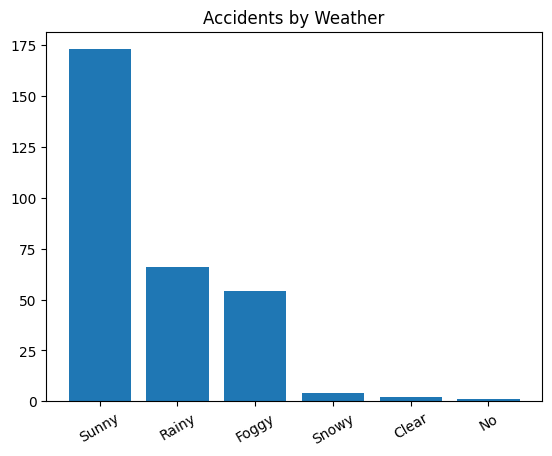

In [6]:
weather_count = df['Weather_Conditions'].value_counts()

plt.bar(weather_count.index, weather_count.values)
plt.xticks(rotation=30)
plt.title("Accidents by Weather")
plt.show()


**📈 4. Speed vs Deaths – Line Chart**

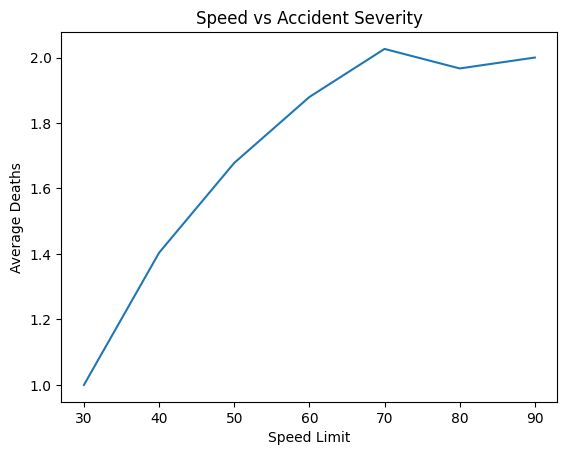

In [7]:
speed_data = df.groupby('Speed_Limit')['Number_of_Deaths'].mean()

plt.plot(speed_data.index, speed_data.values)
plt.xlabel("Speed Limit")
plt.ylabel("Average Deaths")
plt.title("Speed vs Accident Severity")
plt.show()


**🍺 5. Alcohol Related Accidents – Bar Chart**

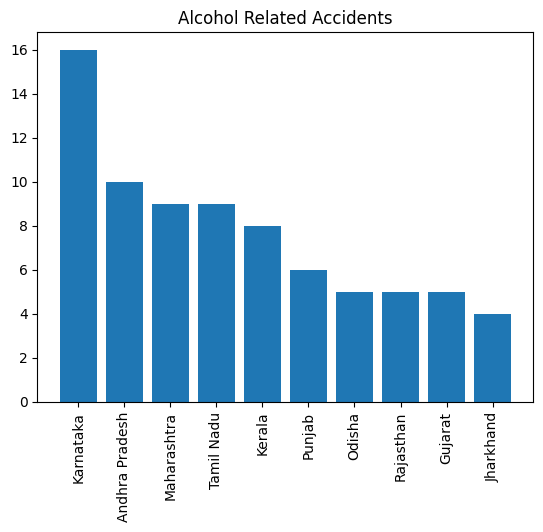

In [8]:
alcohol_df = df[df['Alcohol_Involved'] == 'Yes']
alcohol_state = alcohol_df['State'].value_counts().head(10)

plt.bar(alcohol_state.index, alcohol_state.values)
plt.xticks(rotation=90)
plt.title("Alcohol Related Accidents")
plt.show()


**🏙 6. Rural vs Urban – Pie Chart**

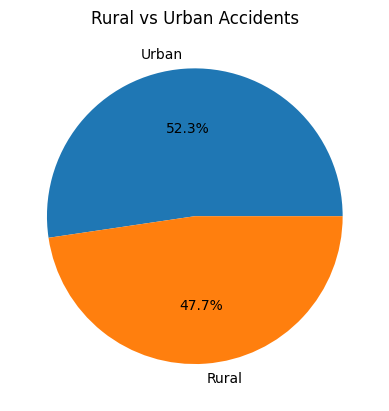

In [9]:
df['Location_Type'] = df['Road_Type'].apply(
    lambda x: 'Rural' if str(x).startswith('R') else 'Urban'
)

location_count = df['Location_Type'].value_counts()

plt.pie(location_count,
        labels=location_count.index,
        autopct='%1.1f%%')
plt.title("Rural vs Urban Accidents")
plt.show()


**⚠ 7. Risk Level Classification**

In [10]:
def classify_risk(row):
    if row['Speed_Limit'] > 80 and row['Alcohol_Involved'] == 'Yes':
        return 'High Risk'
    elif row['Speed_Limit'] > 60:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['Risk_Level'] = df.apply(classify_risk, axis=1)

print(df['Risk_Level'].value_counts())


Risk_Level
Low Risk       227
Medium Risk     72
High Risk        1
Name: count, dtype: int64
